In [ ]:
### 주성분 분석

In [1]:
## PCA 클래스

In [2]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [5]:
print(pca.components_.shape)

(50, 10000)


In [6]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수
    # 한 줄에 이미지 10개씩. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수. 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n개 까지만 그림
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

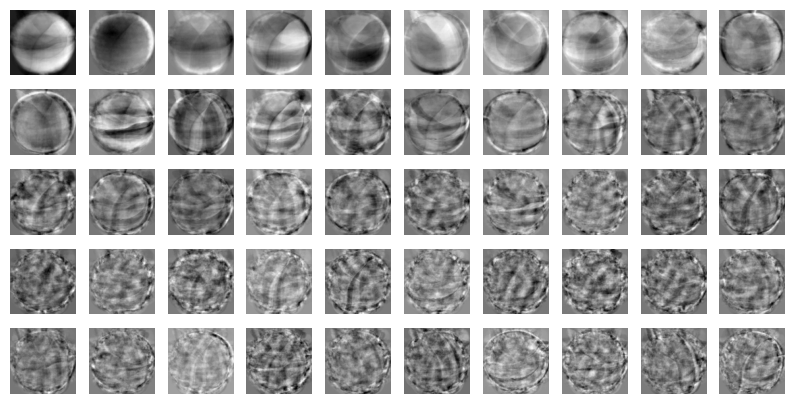

In [7]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [8]:
print(fruits_2d.shape)

(300, 10000)


In [9]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [10]:
## 원본 데이터 재구성

In [12]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


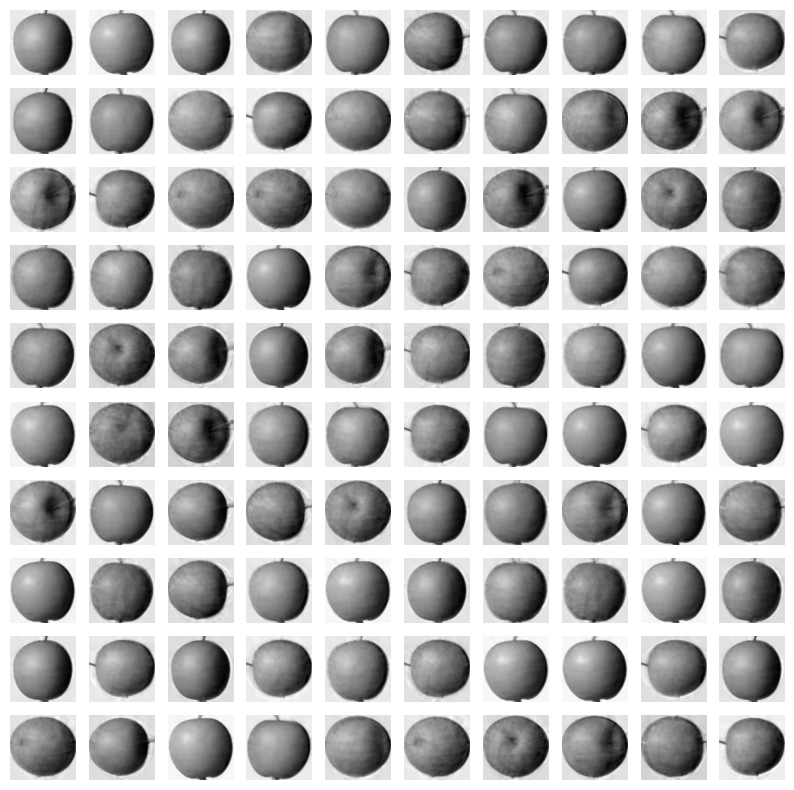

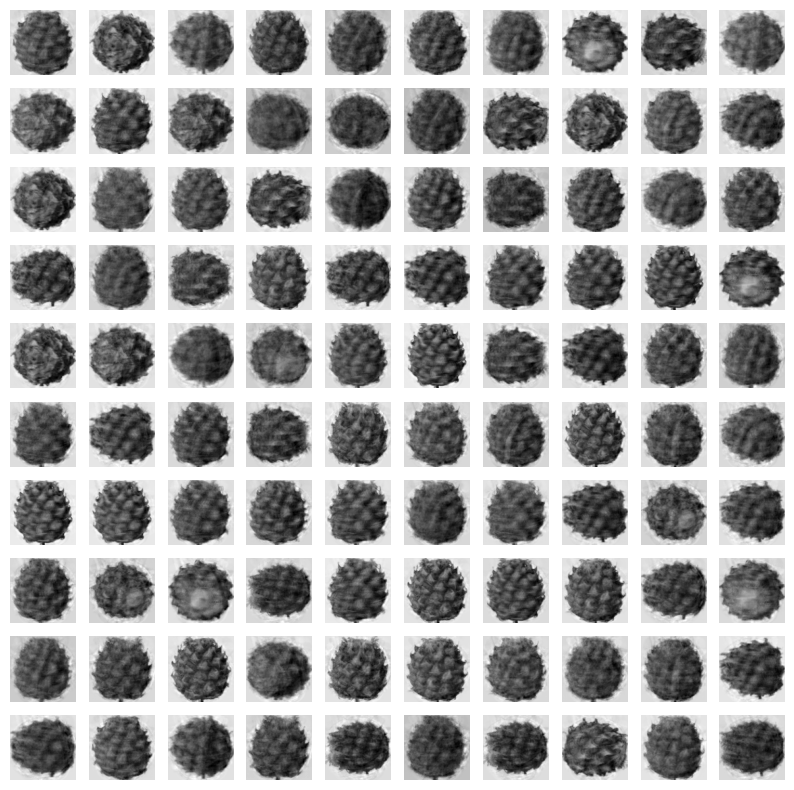

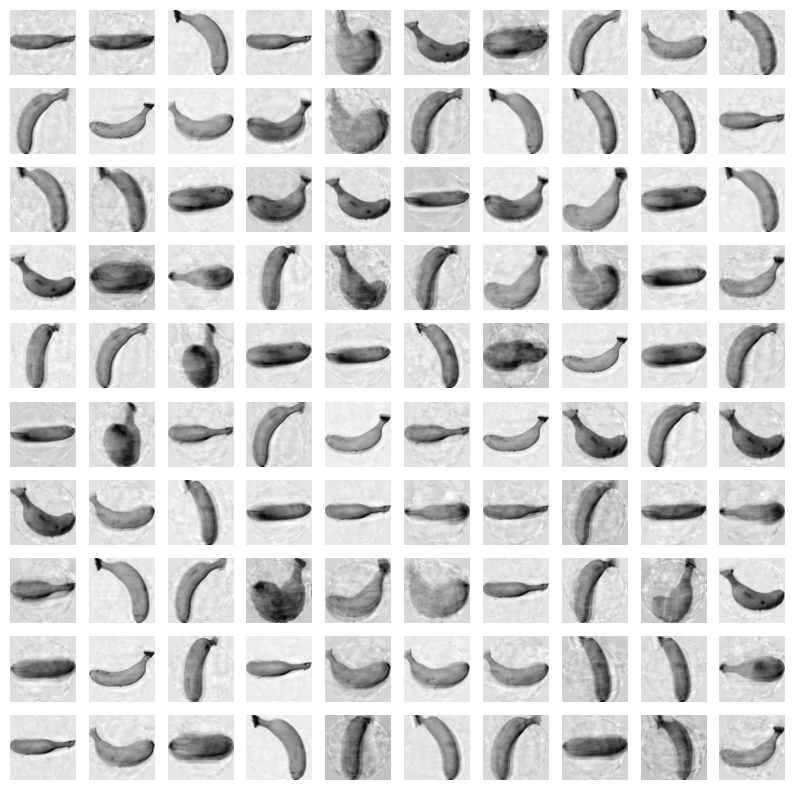

In [13]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [14]:
## 설명된 분산

In [17]:
print(np.sum(pca.explained_variance_ratio_))

0.9216077896179004


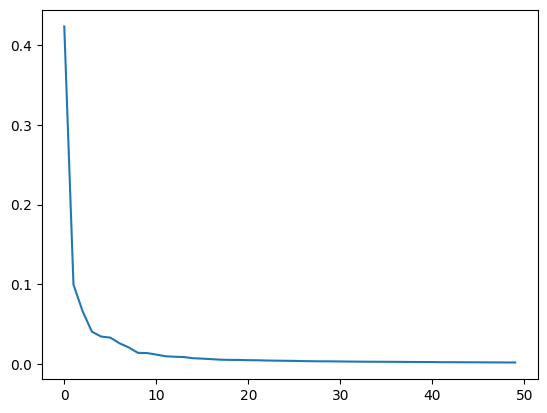

In [18]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
## 다른 알고리즘과 함께 사용하기

In [47]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [48]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [49]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.1738518238067627


In [50]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.0083221435546875


In [51]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [52]:
print(pca.n_components_)

2


In [54]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 실행 결과
# 로지스틱 회귀 모델이 완전히 수렴하지 못했으니 반복을 증가하라는 경고가가 출력

0.99
0.010639238357543945


c:\Users\sanggyu1008\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sanggyu1008\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

In [57]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


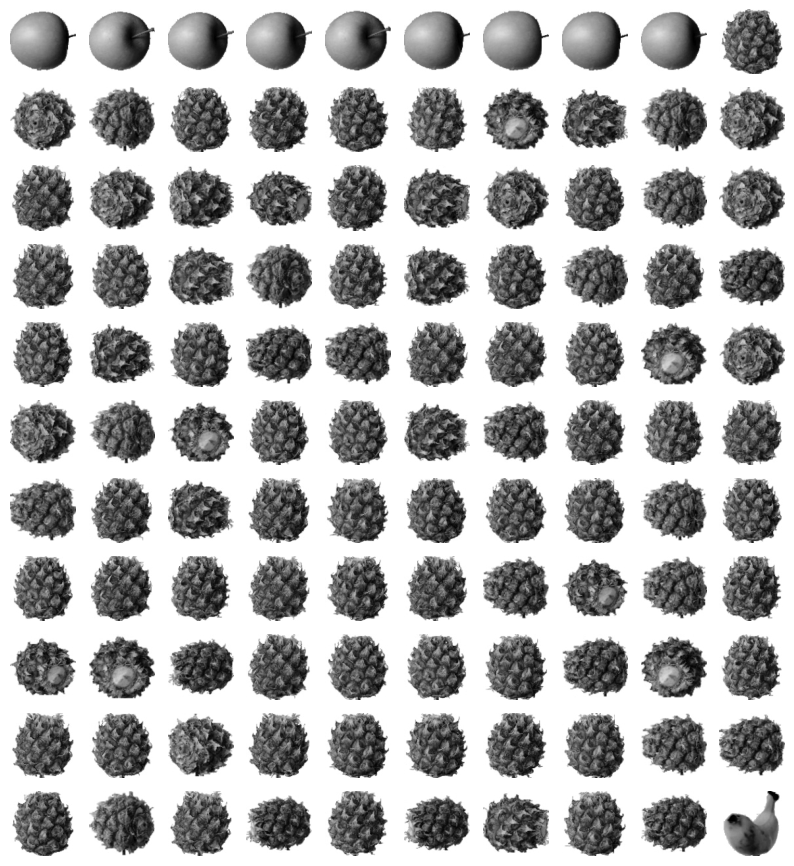

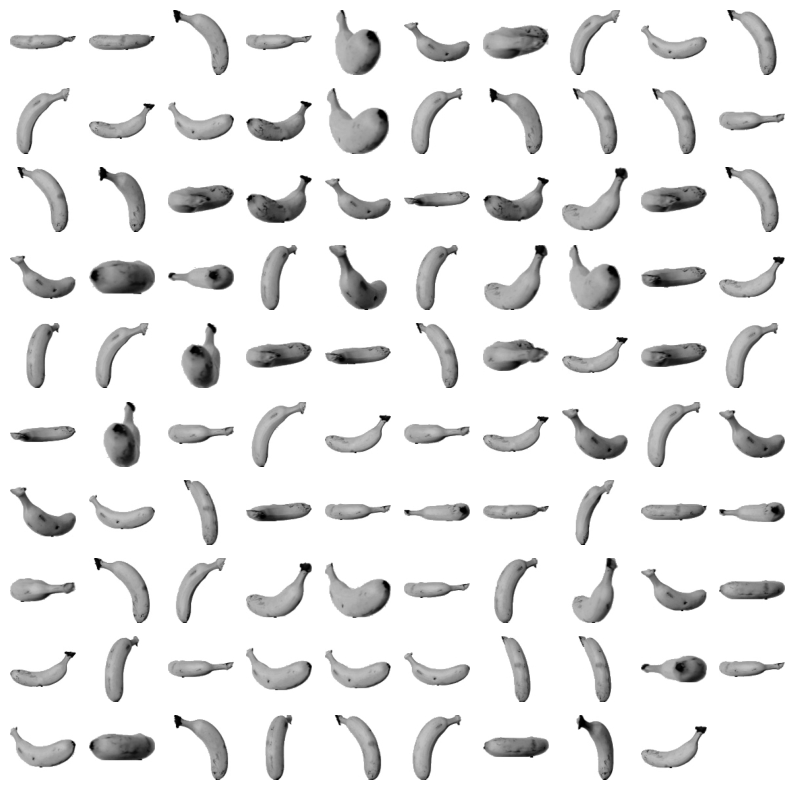

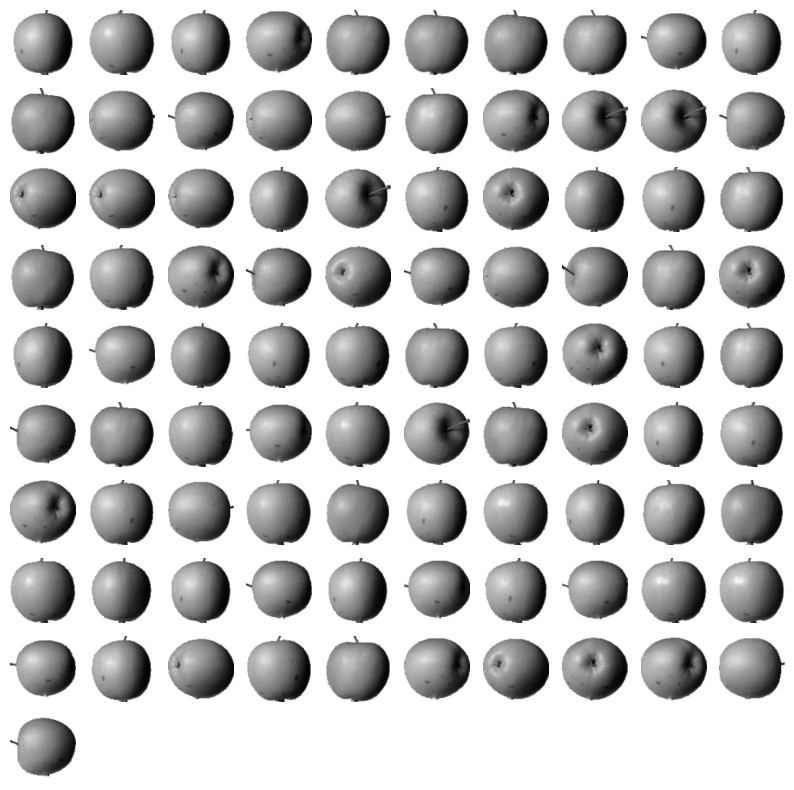

In [58]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

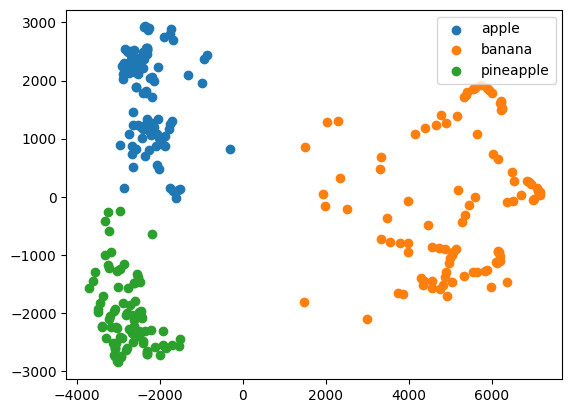

In [59]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()